In [13]:
import pandas as np
import numpy as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

In [16]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [17]:
from sklearn.model_selection import train_test_split

In [60]:
credit = np.read_csv('default of credit card clients.csv', header=1)

In [19]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [20]:
#features
features = credit.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [61]:
#dependent variable
depVar = credit['default payment next month']

In [62]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [63]:
x = credit.iloc[:,0:24]
y = credit.iloc[:,24]
bestfeatures = SelectKBest(score_func=chi2, k=10)

In [44]:
credit.iloc[:,7:12].describe()

,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000


In [64]:
credit2 = credit

In [65]:
for index in credit2.index:
    if credit2['BILL_AMT1'][index] < 0:
        credit2['BILL_AMT1'][index] = 0
        
for index in credit2.index:
    if credit2['BILL_AMT3'][index] < 0:
        credit2['BILL_AMT3'][index] = 0

for index in credit2.index:
    if credit2['BILL_AMT4'][index] < 0:
        credit2['BILL_AMT4'][index] = 0
        
for index in credit2.index:
    if credit2['BILL_AMT5'][index] < 0:
        credit2['BILL_AMT5'][index] = 0
        
for index in credit2.index:
    if credit2['BILL_AMT6'][index] < 0:
        credit2['BILL_AMT6'][index] = 0
        
for index in credit2.index:
    if credit2['BILL_AMT2'][index] < 0:
        credit2['BILL_AMT2'][index] = 0

In [78]:
for index in credit2.index:
    if credit2['PAY_2'][index] == -2:
        credit2['PAY_2'][index] = 200
    elif credit2['PAY_2'][index] == -1:
        credit2['PAY_2'][index] = 100

for index in credit2.index:
    if credit2['PAY_0'][index] == -2:
        credit2['PAY_0'][index] = 200
    elif credit2['PAY_0'][index] == -1:
        credit2['PAY_0'][index] = 100

for index in credit2.index:
    if credit2['PAY_3'][index] == -2:
        credit2['PAY_3'][index] = 200
    elif credit2['PAY_3'][index] == -1:
        credit2['PAY_3'][index] = 100

for index in credit2.index:
    if credit2['PAY_4'][index] == -2:
        credit2['PAY_4'][index] = 200
    elif credit2['PAY_4'][index] == -1:
        credit2['PAY_4'][index] = 100
        
for index in credit2.index:
    if credit2['PAY_5'][index] == -2:
        credit2['PAY_5'][index] = 200
    elif credit2['PAY_5'][index] == -1:
        credit2['PAY_5'][index] = 100
        
for index in credit2.index:
    if credit2['PAY_6'][index] == -2:
        credit2['PAY_6'][index] = 200
    elif credit2['PAY_6'][index] == -1:
        credit2['PAY_6'][index] = 100

In [80]:
x = credit2.iloc[:,0:24]
y = credit2.iloc[:,24]
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)

In [84]:
dfscores = np.DataFrame(fit.scores_)
dfcolumns = np.DataFrame(x.columns)

In [100]:
featureScores = np.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']

print(featureScores.nlargest(22,'Score'))

        Specs         Score
1   LIMIT_BAL  7.106584e+07
19   PAY_AMT2  9.229476e+06
18   PAY_AMT1  7.728847e+06
20   PAY_AMT3  5.630969e+06
23   PAY_AMT6  5.141638e+06
21   PAY_AMT4  4.926667e+06
22   PAY_AMT5  4.433484e+06
12  BILL_AMT1  1.239053e+06
13  BILL_AMT2  6.295760e+05
14  BILL_AMT3  6.039238e+05
15  BILL_AMT4  2.921760e+05
16  BILL_AMT5  1.253549e+05
17  BILL_AMT6  7.178245e+04
6       PAY_0  2.939489e+04
0          ID  2.919758e+04
8       PAY_3  1.740212e+04
7       PAY_2  1.684555e+04
9       PAY_4  1.341187e+04
10      PAY_5  1.093018e+04
11      PAY_6  8.448420e+03
5         AGE  1.385844e+01
3   EDUCATION  7.931259e+00


In [102]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

In [104]:
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [107]:
feat_importances = np.Series(model.feature_importances_, index=x.columns)

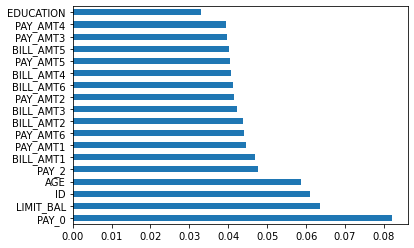

In [112]:
feat_importances.nlargest(18).plot(kind='barh')
plt.show()

In [113]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [114]:
modelRFE = LogisticRegression()

In [132]:
rfe = RFE(modelRFE,10)

In [133]:
max_iter=100000

In [134]:
fit = rfe.fit(x, y)

c:\users\jeanr\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\jeanr\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [135]:
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 10
Selected Features: [False False  True  True  True  True  True  True  True False  True  True
 False False False False False False  True False False False False False]
Feature Ranking: [ 4 11  1  1  1  1  1  1  1  2  1  1  5  6 15 10 13 12  1  3  9  7  8 14]


In [145]:
RFEdata = credit2.iloc[:,[2,3,4,5,6,7,8,10,11,18,24]]

In [147]:
bestData =credit2.iloc[:,[0,1,3,5,6,7,12,13,14,15,16,17,18,19,20,21,22,23,24]]

In [149]:
print(bestData)

          ID  LIMIT_BAL  EDUCATION  AGE  PAY_0  PAY_2  BILL_AMT1  BILL_AMT2  \
0          1      20000          2   24      2      2       3913       3102   
1          2     120000          2   26    100      2       2682       1725   
2          3      90000          2   34      0      0      29239      14027   
3          4      50000          2   37      0      0      46990      48233   
4          5      50000          2   57    100      0       8617       5670   
...      ...        ...        ...  ...    ...    ...        ...        ...   
29995  29996     220000          3   39      0      0     188948     192815   
29996  29997     150000          3   43    100    100       1683       1828   
29997  29998      30000          2   37      4      3       3565       3356   
29998  29999      80000          3   41      1    100          0      78379   
29999  30000      50000          2   46      0      0      47929      48905   

       BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  

In [150]:
bestData.head()

,ID,LIMIT_BAL,EDUCATION,AGE,PAY_0,PAY_2,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,24,2,2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,26,100,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,34,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,37,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,2,57,100,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [152]:
#dependent variable
depBestVar = bestData['default payment next month']

In [153]:
#dependent variable
depRFEVar = RFEdata['default payment next month']

In [169]:
bestFinal =  bestData.iloc[:,0:18]

In [178]:
RFEFinal = RFEdata.iloc[:,0:10]

In [180]:
x_trainBest = bestFinal[:1000]

In [181]:
y_trainBest = depBestVar[:1000]
y_trainBest_count = len(y_trainBest.index)
print('The number of observations in the Y training set are:',str(y_trainBest_count) )
y_trainBest.head()

The number of observations in the Y training set are: 1000


0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [182]:
x_trainREF = RFEFinal[:1000]
y_trainREF = depRFEVar[:1000]
y_trainREF_count = len(y_trainREF.index)
print('The number of observations in the Y training set are:',str(y_trainREF_count) )
y_trainREF.head()

The number of observations in the Y training set are: 1000


0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [186]:
#step 5

In [184]:
#the best k feture space for testing
x_testBest = bestFinal[-100:]
x_testBest_count = len(x_testBest.index)
print('The number of observations in the feature testing set is:',str(x_testBest_count))
print(x_testBest.head())

The number of observations in the feature testing set is: 100
          ID  LIMIT_BAL  EDUCATION  AGE  PAY_0  PAY_2  BILL_AMT1  BILL_AMT2  \
29900  29901      20000          2   29      0      0      16809          0   
29901  29902      50000          2   29      1      2      50845      48750   
29902  29903     170000          3   30      0    100      10392     168088   
29903  29904     260000          1   30    100      0      27378      17082   
29904  29905      60000          3   30      0      0      54952      56021   

       BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
29900          0          0          0          0         0         0   
29901     103486      50590      50248      49387         0      6556   
29902     168955     161351     126198     124746    168096      6409   
29903      13333         99         99     172104     10018     13333   
29904      54126      58732      59306      59728      2600      4553   

       PAY_AMT3  PAY_AMT

In [187]:
#the RFE feture space for testing
x_testRFE = RFEFinal[-100:]
x_testREF_count = len(x_testRFE.index)
print('The number of observations in the feature testing set is:',str(x_testREF_count))
print(x_testRFE.head())

The number of observations in the feature testing set is: 100
       SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_5  PAY_6  \
29900    1          2         2   29      0      0    200    200    200   
29901    1          2         2   29      1      2      0      0      0   
29902    1          3         2   30      0    100      0      0      0   
29903    1          1         1   30    100      0    100    100    100   
29904    1          3         2   30      0      0      0      0      0   

       PAY_AMT1  
29900         0  
29901         0  
29902    168096  
29903     10018  
29904      2600  


In [188]:
#step 6

In [191]:
y_testBest = depBestVar[-100:]
y_testBest_count = len(y_testBest.index)
print('The number of observations in the Y training set are:',str(y_testBest_count))
y_testBest.head()

The number of observations in the Y training set are: 100


29900    1
29901    0
29902    0
29903    0
29904    1
Name: default payment next month, dtype: int64

In [192]:
y_testREF = depRFEVar[-100:]
y_testREF_count = len(y_testREF.index)
print('The number of observations in the Y training set are:',str(y_testREF_count))
y_testREF.head()

The number of observations in the Y training set are: 100


29900    1
29901    0
29902    0
29903    0
29904    1
Name: default payment next month, dtype: int64

In [193]:
#Cross Validation

In [195]:
from sklearn.model_selection import train_test_split

In [210]:
#RFE datasetfrom sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(x_trainREF, y_trainREF)
X_train.shape, X_test.shape

((750, 10), (250, 10))

In [211]:
#Best dataset
X_train, X_test, y_train, y_test = train_test_split(x_trainBest, y_trainREF)
X_train.shape, X_test.shape

((750, 18), (250, 18))

In [212]:
from sklearn.linear_model import LinearRegression

In [213]:
model = LinearRegression(n_jobs=10)

In [214]:
#Building the models and choosing the right model

In [216]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [217]:
#define the models

In [219]:
#best
modelSVRBest = SVR()
modelRFBest = RandomForestRegressor()
modelLRBest = LinearRegression()
#REF
modelSVRREF = SVR()
modelRFREF = RandomForestRegressor()
modelLRREF = LinearRegression()

In [220]:
#best
modelSVRBest.fit(x_trainBest,y_trainBest)
modelRFBest.fit(x_trainBest,y_trainBest)
modelLRBest.fit(x_trainBest,y_trainBest)
#REF
modelSVRREF.fit(x_trainREF,y_trainREF)
modelRFREF.fit(x_trainREF,y_trainREF)
modelLRREF.fit(x_trainREF,y_trainREF)

LinearRegression()

In [221]:
#Choosing the Right Model

In [222]:
from sklearn.model_selection import cross_val_score

In [232]:
modelSVRBest.fit(x_trainBest,y_trainBest)
print(cross_val_score(modelSVRBest, x_trainBest, y_trainBest))
modelSVRBest.score(x_trainBest,y_trainBest)

[-0.11796241 -0.0937061  -0.0544472  -0.03567457 -0.09957681]


-0.03931301366156914

In [233]:
modelRFBest.fit(x_trainBest,y_trainBest)
print(cross_val_score(modelRFBest, x_trainBest, y_trainBest)) 
modelRFBest.score(x_trainBest,y_trainBest)

[-0.04150762  0.06953947  0.15100476  0.06783133  0.06727168]


0.8774095740886066

In [234]:
modelLRBest.fit(x_trainBest,y_trainBest)
print(cross_val_score(modelLRBest, x_trainBest, y_trainBest)) 
modelLRBest.score(x_trainBest,y_trainBest)

[ 0.02709014  0.03904443  0.00329304 -0.02152591 -0.06737466]


0.03961620857356574

In [244]:
#REF
modelSVRREF.fit(x_trainREF,y_trainREF)
print(cross_val_score(modelSVRREF, x_trainREF, y_trainREF)) 
modelSVRREF.score(x_trainREF,y_trainREF)

[-0.095378   -0.10751082 -0.06707786 -0.03556184 -0.08938679]


-0.07685885149269023

In [245]:
modelRFREF.fit(x_trainREF,y_trainREF)
print(cross_val_score(modelRFREF, x_trainREF, y_trainREF)) 
modelRFREF.score(x_trainREF,y_trainREF)

[-0.00291271 -0.00790125  0.04158413 -0.0592057   0.10018973]


0.8586633172521424

In [246]:
modelLRREF.fit(x_trainREF,y_trainREF)
print(cross_val_score(modelLRREF, x_trainREF, y_trainREF)) 
modelLRREF.score(x_trainREF,y_trainREF)

[ 0.01327133  0.01623739  0.00159045 -0.02891001  0.00500965]


0.02895833771988421

In [247]:
#prediction

In [248]:
#best DataSource

In [264]:
predictionBestSVR = modelSVRBest.predict(x_testBest)
predictionBestRF = modelRFBest.predict(x_testBest)
predictionBestLR = modelLRBest.predict(x_testBest)

In [250]:
#RFE DataSource

In [251]:
predictionRFESVR = modelSVRREF.predict(x_testRFE)
predictionRFERF = modelRFREF.predict(x_testRFE)
predictionRFELR = modelLRREF.predict(x_testRFE)

In [253]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [265]:
#SVR for best datasource
rmse = sqrt(mean_squared_error(y_testBest, predictionBestSVR))
predRsquared = r2_score(y_testBest,predictionBestSVR)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.130
RMSE: 0.460


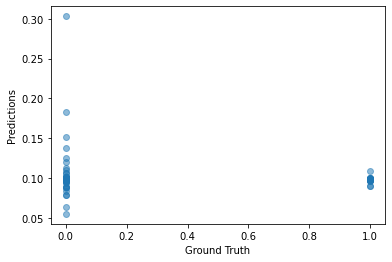

In [277]:
plt.scatter(y_testBest, predictionBestSVR, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [279]:
#RF for best datasource
rmse = sqrt(mean_squared_error(y_testBest, predictionBestRF))
predRsquared = r2_score(y_testBest,predictionBestRF)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.139
RMSE: 0.462


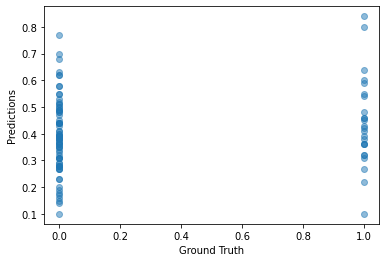

In [280]:
plt.scatter(y_testBest, predictionBestRF, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [281]:
#LR for best datasource
rmse = sqrt(mean_squared_error(y_testBest, predictionBestLR))
predRsquared = r2_score(y_testBest,predictionBestLR)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -2.346
RMSE: 0.792


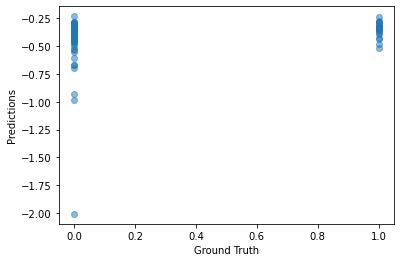

In [282]:
plt.scatter(y_testBest, predictionBestLR, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [283]:
#RF for best datasource
rmse = sqrt(mean_squared_error(y_testREF, predictionRFERF))
predRsquared = r2_score(y_testREF,predictionRFERF)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.132
RMSE: 0.403


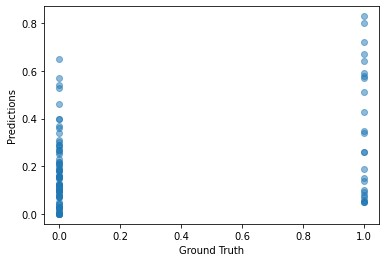

In [284]:
plt.scatter(y_testREF, predictionRFERF, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [285]:
#SVR for best datasource
rmse = sqrt(mean_squared_error(y_testREF, predictionRFESVR))
predRsquared = r2_score(y_testREF,predictionRFESVR)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.117
RMSE: 0.458


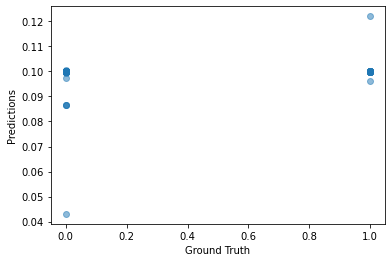

In [286]:
plt.scatter(y_testREF, predictionRFESVR, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [287]:
#LR for best datasource
rmse = sqrt(mean_squared_error(y_testREF, predictionRFELR))
predRsquared = r2_score(y_testREF,predictionRFELR)
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.006
RMSE: 0.434


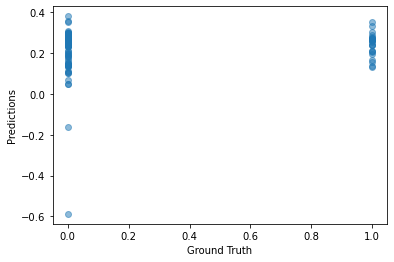

In [288]:
plt.scatter(y_testREF, predictionRFELR, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();